In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yahooquery import Ticker

In [2]:
analyst_data = pd.read_csv('data/WithCashFlowDataNoOutliers.csv')

In [3]:
analyst_data.head()

,Index,Ticker,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
0,0,A,166.5,14,138.09,4.088458e+10,0.206,1,4.930681e+10,6.848000e+09,1.985000e+09,0.10102,80000000.0,529000000.0,1.353000e+09,41000000.0
1,1,AA,50.0,11,39.43,7.032538e+09,0.268,1,8.917258e+09,1.245100e+10,2.142000e+09,0.05931,-231000000.0,299000000.0,8.220000e+08,0.0
2,4,AAN,16.0,5,9.54,2.936460e+08,0.677,1,4.924443e+08,2.249434e+09,7.345500e+08,0.06360,0.0,403930000.0,1.704320e+08,0.0
3,5,AAOI,3.4,4,2.11,6.130162e+07,0.611,1,9.875690e+07,2.228180e+08,-3.543400e+07,-0.08548,24643000.0,11253000.0,-1.402200e+07,0.0
4,6,AAP,155.0,17,120.21,7.122887e+09,0.289,1,9.181402e+09,1.115472e+10,9.909550e+08,0.03891,0.0,156733000.0,7.222220e+08,0.0


Setting Index as Ticker

In [4]:
analyst_data.drop(['Index'], axis=1, inplace = True)
analyst_data.set_index(['Ticker'], inplace = True)

In [5]:
# Making AveragePriceTarget, ClosingPrice rounded to 2 places
analyst_data['AveragePriceTarget'] = analyst_data['AveragePriceTarget'].round(2)
analyst_data['ClosingPrice'] = analyst_data['ClosingPrice'].round(2)

In [6]:
analyst_data['ExpectedGrowthRate'] = ((analyst_data['AveragePriceTarget']-analyst_data['ClosingPrice'])/analyst_data['ClosingPrice']).round(3)

In [7]:
analyst_data.head()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
Ticker,,,,,,,,,,,,,,
A,166.5,14,138.09,4.088458e+10,0.206,1,4.930681e+10,6.848000e+09,1.985000e+09,0.10102,80000000.0,529000000.0,1.353000e+09,41000000.0
AA,50.0,11,39.43,7.032538e+09,0.268,1,8.917258e+09,1.245100e+10,2.142000e+09,0.05931,-231000000.0,299000000.0,8.220000e+08,0.0
AAN,16.0,5,9.54,2.936460e+08,0.677,1,4.924443e+08,2.249434e+09,7.345500e+08,0.06360,0.0,403930000.0,1.704320e+08,0.0
AAOI,3.4,4,2.11,6.130162e+07,0.611,1,9.875690e+07,2.228180e+08,-3.543400e+07,-0.08548,24643000.0,11253000.0,-1.402200e+07,0.0
AAP,155.0,17,120.21,7.122887e+09,0.289,1,9.181402e+09,1.115472e+10,9.909550e+08,0.03891,0.0,156733000.0,7.222220e+08,0.0


In [9]:
# Removing Rows that have less than 3 ratings
analyst_data = analyst_data[analyst_data['NumRatings'] >= 4]

In [10]:
analyst_data.dropna(inplace = True)

In [11]:
analyst_data.describe()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
count,2136.000000,2136.000000,2136.000000,2.136000e+03,2136.000000,2136.000000,2.136000e+03,2.136000e+03,2.136000e+03,2136.000000,2.136000e+03,2.136000e+03,2.136000e+03,2.136000e+03
mean,68.737004,9.224719,57.130066,8.593780e+09,0.699404,0.590824,1.009959e+10,3.756765e+09,7.172493e+08,-0.043569,3.178887e+07,4.478589e+08,5.049861e+08,2.450304e+06
std,135.298078,4.647385,123.570656,1.785242e+10,1.155297,0.569473,1.992935e+10,7.018417e+09,1.436034e+09,0.199080,1.349144e+08,1.004820e+09,1.034982e+09,9.799373e+07
min,0.600000,4.000000,0.240000,2.822783e+07,-0.151000,-1.000000,4.259801e+07,0.000000e+00,-9.360000e+08,-1.000000,-4.180000e+08,-1.514000e+09,-5.137450e+08,-1.710000e+09
25%,13.500000,5.000000,8.092500,6.621685e+08,0.132000,0.000000,1.143221e+09,2.161578e+08,-3.682400e+07,-0.096987,0.000000e+00,6.043031e+06,-2.850175e+07,0.000000e+00
50%,32.000000,8.000000,23.620000,2.354210e+09,0.286000,1.000000,3.160352e+09,1.036120e+09,1.823625e+08,0.022365,0.000000e+00,9.987600e+07,1.190055e+08,0.000000e+00
75%,78.000000,12.000000,64.187500,7.147960e+09,0.666250,1.000000,8.739960e+09,4.018505e+09,8.048250e+08,0.060735,7.383500e+06,4.685705e+08,5.648008e+08,0.000000e+00
max,2800.000000,20.000000,2615.600000,1.972006e+11,8.231000,1.000000,2.271751e+11,1.091200e+11,1.257500e+10,0.238460,1.309928e+09,8.335000e+09,7.762000e+09,2.518713e+09


In [21]:
AverageMarketGrowthRate = 0.1
analyst_data['OverallRecommendation'] = analyst_data['ExpectedGrowthRate'].apply(lambda x: 1 if x > AverageMarketGrowthRate else 0)

In [22]:
analyst_data['OverallRecommendation'].value_counts()

1    1723
0     413
Name: OverallRecommendation, dtype: int64

In [17]:
analyst_data.head()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
Ticker,,,,,,,,,,,,,,
A,166.5,14,138.09,4.088458e+10,0.206,1,4.930681e+10,6.848000e+09,1.985000e+09,0.10102,80000000.0,529000000.0,1.353000e+09,41000000.0
AA,50.0,11,39.43,7.032538e+09,0.268,1,8.917258e+09,1.245100e+10,2.142000e+09,0.05931,-231000000.0,299000000.0,8.220000e+08,0.0
AAN,16.0,5,9.54,2.936460e+08,0.677,1,4.924443e+08,2.249434e+09,7.345500e+08,0.06360,0.0,403930000.0,1.704320e+08,0.0
AAOI,3.4,4,2.11,6.130162e+07,0.611,1,9.875690e+07,2.228180e+08,-3.543400e+07,-0.08548,24643000.0,11253000.0,-1.402200e+07,0.0
AAP,155.0,17,120.21,7.122887e+09,0.289,1,9.181402e+09,1.115472e+10,9.909550e+08,0.03891,0.0,156733000.0,7.222220e+08,0.0


In [20]:
# Getting Projected Market Cap- Based on analyst consensus growth rate
analyst_data['ProjectedMarketCap'] = ((analyst_data['MarketCap'] * analyst_data['ExpectedGrowthRate']) + analyst_data['MarketCap'])

In [8]:
analyst_data.head()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
Ticker,,,,,,,,,,,,,,
A,166.50,14,138.09,4.088458e+10,0.206,1,4.930681e+10,6.848000e+09,1.985000e+09,0.10102,8.000000e+07,5.290000e+08,1.353000e+09,41000000.0
AA,50.00,11,39.43,7.032538e+09,0.268,1,8.917258e+09,1.245100e+10,2.142000e+09,0.05931,-2.310000e+08,2.990000e+08,8.220000e+08,0.0
AAL,16.62,14,13.89,1.862496e+10,0.197,0,2.229408e+10,4.897100e+10,1.423200e+10,0.02124,2.454000e+09,1.908900e+10,2.173000e+09,0.0
AAN,16.00,5,9.54,2.936460e+08,0.677,1,4.924443e+08,2.249434e+09,7.345500e+08,0.06360,0.000000e+00,4.039300e+08,1.704320e+08,0.0
AAOI,3.40,4,2.11,6.130162e+07,0.611,1,9.875690e+07,2.228180e+08,-3.543400e+07,-0.08548,2.464300e+07,1.125300e+07,-1.402200e+07,0.0


In [17]:
# Write to CSV File to Transfer to Modeling Notebook
analyst_data.to_csv('WithCashFlowDataNoOutliers.csv')

### Total Revenue EDA

In [16]:
data_with_revenue = pd.read_csv('data/WithROA.csv')
EDAData = analyst_data

In [17]:
EDAData.describe()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
count,2781.000000,2781.000000,2781.000000,2.781000e+03,2781.000000,2781.000000,2.781000e+03,2.781000e+03,2.781000e+03,2781.000000,2.528000e+03,2.769000e+03,2.747000e+03,2.704000e+03
mean,71.789151,9.497663,59.824685,1.804910e+10,0.819042,0.578209,2.103295e+10,2.095597e+10,2.701597e+09,-0.045690,1.601006e+08,4.421622e+09,5.073203e+09,1.280634e+08
std,168.171695,4.886379,157.200220,8.697342e+10,1.808626,0.584032,9.742327e+10,4.653413e+11,3.447049e+10,0.219327,6.088747e+09,1.330105e+11,1.305967e+11,5.292304e+09
min,0.500000,4.000000,0.130000,5.768278e+06,-0.658000,-1.000000,4.079418e+07,-1.116000e+09,-1.418712e+10,-1.574310,-3.398200e+10,-4.812300e+10,-4.359700e+10,-2.368900e+10
25%,14.000000,5.000000,8.480000,7.214495e+08,0.132000,0.000000,1.192603e+09,2.450060e+08,-2.900800e+07,-0.080630,0.000000e+00,3.000000e+05,-2.653108e+07,0.000000e+00
50%,33.000000,8.000000,24.100000,2.696536e+09,0.282000,1.000000,3.542668e+09,1.314136e+09,1.416890e+08,0.019570,0.000000e+00,9.954500e+07,1.683100e+08,0.000000e+00
75%,79.000000,13.000000,64.840000,9.867018e+09,0.622000,1.000000,1.189968e+10,5.802300e+09,9.443000e+08,0.058870,9.090750e+06,5.933930e+08,8.419625e+08,0.000000e+00
max,5712.500000,20.000000,5542.840000,2.593336e+12,27.788000,1.000000,2.738563e+12,2.420569e+13,1.589774e+12,0.581270,2.998992e+11,6.844803e+12,6.564226e+12,2.674623e+11


In [18]:
data_with_revenue['TotalRevenue'].max()

24205693000000.0

In [32]:
data_with_revenue[data_with_revenue['TotalRevenue'] == 31379507000000.0]

,Index,Ticker,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets


In [33]:
#data_with_revenue.drop([970, 2861], inplace=True)

In [21]:
EDAData.describe()

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
count,2781.000000,2781.000000,2781.000000,2.781000e+03,2781.000000,2781.000000,2.781000e+03,2.781000e+03,2.781000e+03,2781.000000,2.528000e+03,2.769000e+03,2.747000e+03,2.704000e+03
mean,71.789151,9.497663,59.824685,1.804910e+10,0.819042,0.578209,2.103295e+10,2.095597e+10,2.701597e+09,-0.045690,1.601006e+08,4.421622e+09,5.073203e+09,1.280634e+08
std,168.171695,4.886379,157.200220,8.697342e+10,1.808626,0.584032,9.742327e+10,4.653413e+11,3.447049e+10,0.219327,6.088747e+09,1.330105e+11,1.305967e+11,5.292304e+09
min,0.500000,4.000000,0.130000,5.768278e+06,-0.658000,-1.000000,4.079418e+07,-1.116000e+09,-1.418712e+10,-1.574310,-3.398200e+10,-4.812300e+10,-4.359700e+10,-2.368900e+10
25%,14.000000,5.000000,8.480000,7.214495e+08,0.132000,0.000000,1.192603e+09,2.450060e+08,-2.900800e+07,-0.080630,0.000000e+00,3.000000e+05,-2.653108e+07,0.000000e+00
50%,33.000000,8.000000,24.100000,2.696536e+09,0.282000,1.000000,3.542668e+09,1.314136e+09,1.416890e+08,0.019570,0.000000e+00,9.954500e+07,1.683100e+08,0.000000e+00
75%,79.000000,13.000000,64.840000,9.867018e+09,0.622000,1.000000,1.189968e+10,5.802300e+09,9.443000e+08,0.058870,9.090750e+06,5.933930e+08,8.419625e+08,0.000000e+00
max,5712.500000,20.000000,5542.840000,2.593336e+12,27.788000,1.000000,2.738563e+12,2.420569e+13,1.589774e+12,0.581270,2.998992e+11,6.844803e+12,6.564226e+12,2.674623e+11


(0.0, 1000000000000.0)

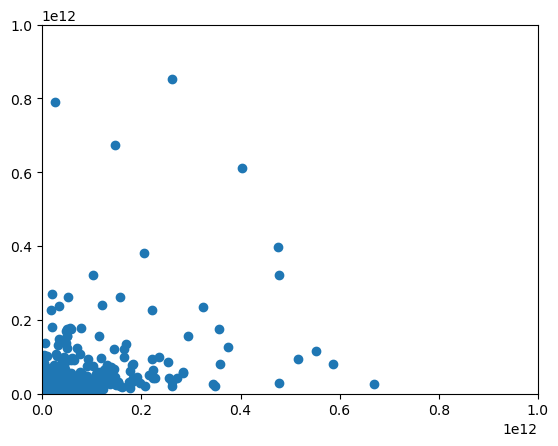

In [42]:
plt.scatter(EDAData['MarketCap'], EDAData['TotalRevenue'])
plt.xlim([-1e9,1e12])
plt.ylim([0,1e12])

<AxesSubplot: title={'center': 'TotalRevenue'}, xlabel='OverallRecommendation'>

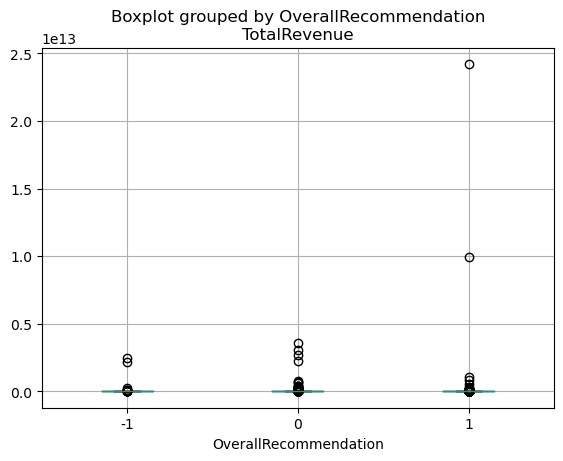

In [43]:
EDAData.boxplot(column='TotalRevenue', by='OverallRecommendation')

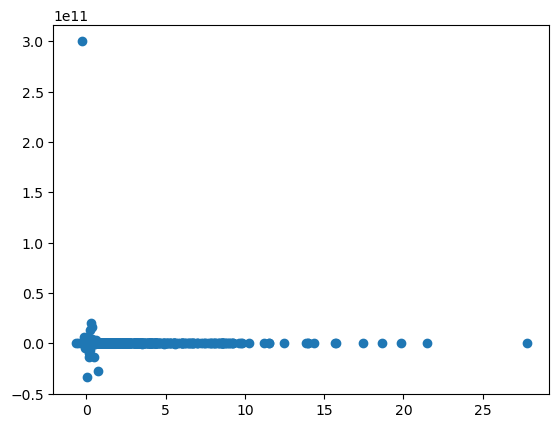

In [39]:
plt.scatter(EDAData['ExpectedGrowthRate'], EDAData['ChangeNormEBITDA'])

In [40]:
EDAData.describe()['ChangeNormEBITDA']['max']

299899219160.0

In [41]:
EDAData[EDAData['ChangeNormEBITDA'] == 299899219160.0]

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
Ticker,,,,,,,,,,,,,,
YPF,8.6,5,11.47,8.858499e+09,-0.25,-1,6.643874e+09,2.484211e+12,7.717760e+11,0.05147,2.998992e+11,1.241140e+12,1.004122e+12,2.674623e+11


### EBITDA EDA

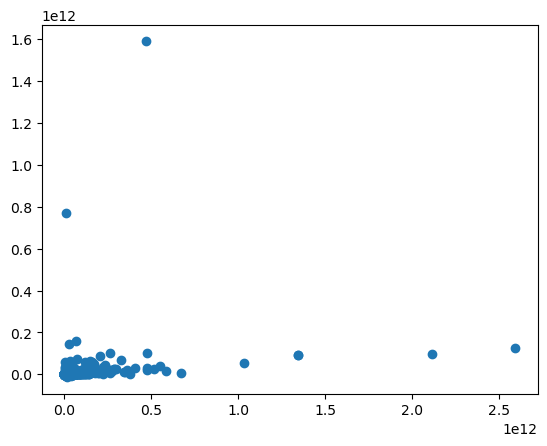

In [38]:
plt.scatter(EDAData['MarketCap'], EDAData['NormEBITDA'])

It looks like we have some outliers messing up our data that we dropped to make these better looking visualizations. We should remove them from our model as well, because they may hurt our training sample

### ROA EDA

<AxesSubplot: title={'center': 'ReturnOnAssets'}, xlabel='[OverallRecommendation]'>

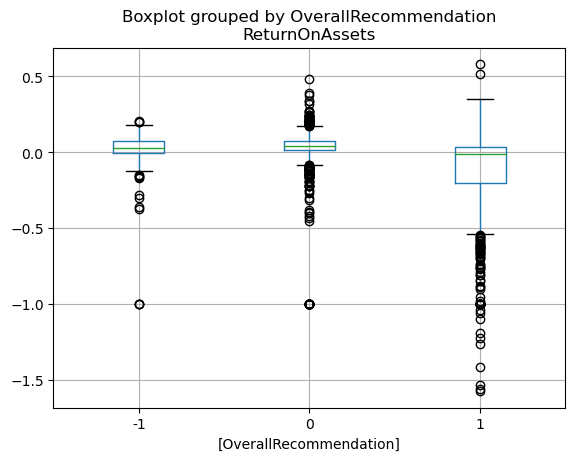

In [50]:
EDAData.boxplot(by = ['OverallRecommendation'], column = ['ReturnOnAssets'])

Operating Cash Flow EDA

In [36]:
EDAData.describe()['OperatingCashFlow']['max']

6564226000000.0

In [37]:
EDAData[EDAData['OperatingCashFlow'] == 6564226000000.0]

,AveragePriceTarget,NumRatings,ClosingPrice,MarketCap,ExpectedGrowthRate,OverallRecommendation,ProjectedMarketCap,TotalRevenue,NormEBITDA,ReturnOnAssets,ChangeNormEBITDA,ChangeRevenue,OperatingCashFlow,ChangeOCF
Ticker,,,,,,,,,,,,,,
CIB,35.0,5,25.89,6.964281e+09,0.352,1,9.415707e+09,2.420569e+13,0.0,0.02177,NaN,6.844803e+12,6.564226e+12,0.0


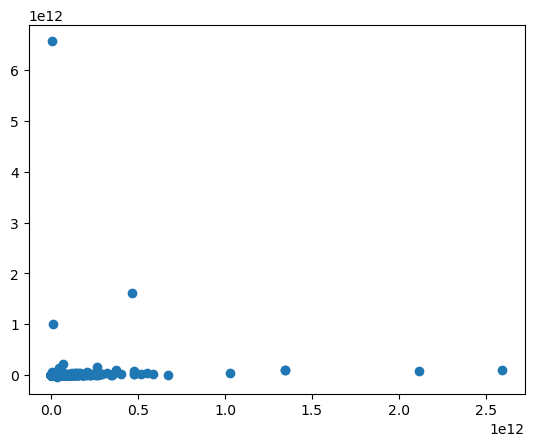

In [33]:
plt.scatter(EDAData['MarketCap'], EDAData['OperatingCashFlow'])